# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
%matplotlib inline
sns.set()

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

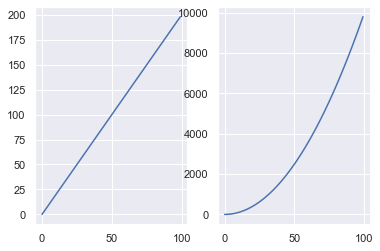

In [3]:
# Method 1
plt.figure()
plt.subplot(1,2,1)
plt.plot(x, y)
plt.subplot(1,2,2)
plt.plot(x, z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

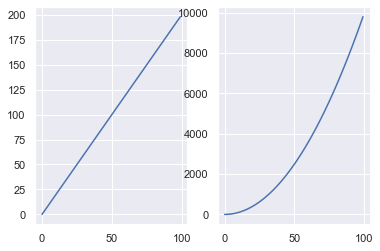

In [4]:
# Method 2
fig, axes=plt.subplots(1,2)
axes[0].plot(x, y)
axes[1].plot(x, z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0.5, 1.0, 'Quadratic')

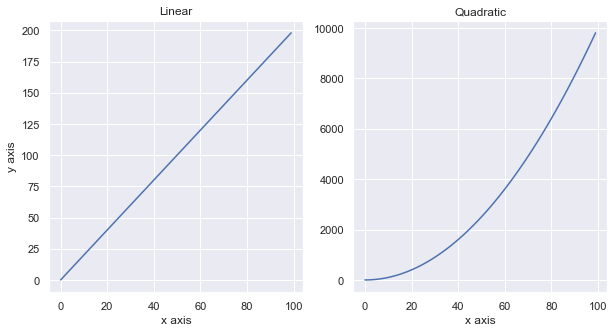

In [5]:
# your code here
fig, axes=plt.subplots(1,2, figsize=(10,5))
axes[0].plot(x, y)
axes[1].plot(x, z)
axes[0].set_xlabel('x axis')
axes[0].set_ylabel('y axis')
axes[1].set_xlabel('x axis')
axes[0].set_title('Linear')
axes[1].set_title('Quadratic')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

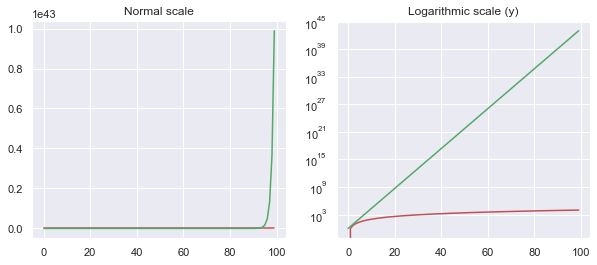

In [6]:
f, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(x, x**2, 'r', x, np.exp(x), 'g')
ax[0].set_title("Normal scale")

ax[1].plot(x, x**2, 'r', x, np.exp(x), 'g')
ax[1].set_yscale("log")
ax[1].set_title("Logarithmic scale (y)")

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

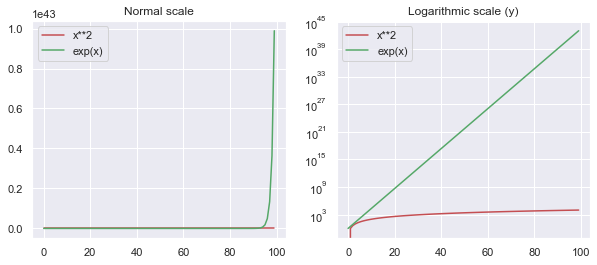

In [7]:
# your code here
f, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].plot(x, x**2, 'r', label = 'x**2')
ax[0].plot(x, np.exp(x), 'g', label = 'exp(x)')
ax[0].set_title("Normal scale")
ax[0].legend()

ax[1].plot(x, x**2, 'r', label = 'x**2')
ax[1].plot(x, np.exp(x), 'g', label = 'exp(x)')
ax[1].set_yscale("log")
ax[1].set_title("Logarithmic scale (y)")
ax[1].legend()

plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5


In [9]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

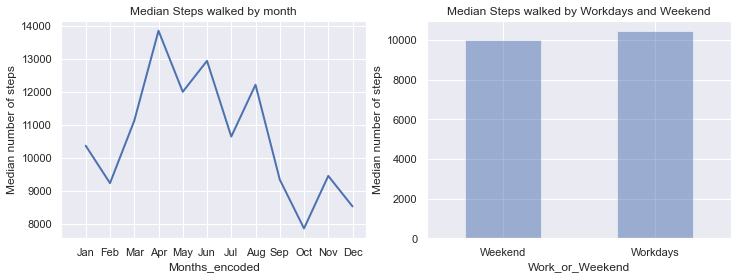

In [10]:
# MEDIAN STEPS BY MONTH_ENCODED
# Find the median steps for each month
weekday_steps = fitbit['Steps'].groupby(fitbit['Months_encoded']).median()

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1,2, figsize = (12,4))

# Set the current axes instance to ax[0] - Now plt methods will affect ax[0]
plt.sca(ax[0])

# Plot the weekday steps in the current axes
weekday_steps.plot(kind = 'line',linewidth=2)

# Add labels, title, etc
plt.ylabel('Median number of steps')
plt.xlabel('Months_encoded')
plt.title('Median Steps walked by month')
plt.xticks(range(13), ['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Save the figure
plt.savefig('figures/steps_months.png',bbox_inches='tight')

# MEDIAN STEPS BY WORK_OR_WEEKEND
# Set the current axes instance to ax[1] - Now plt methods will affect ax[1]
plt.sca(ax[1])

# Find the median steps for workdays and weekdays
weekday_steps = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median().sort_values()

# Plot the workday and weekend steps in the current axes
weekday_steps.plot(kind = 'bar', alpha = 0.5)

# Add labels, title, etc
plt.ylabel('Median number of steps')
plt.title('Median Steps walked by Workdays and Weekend')
plt.xticks(range(2), ['Weekend','Workdays'], rotation = 0)

# Save the figure
plt.savefig('figures/steps_work_weekend.png', bbox_inches='tight')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

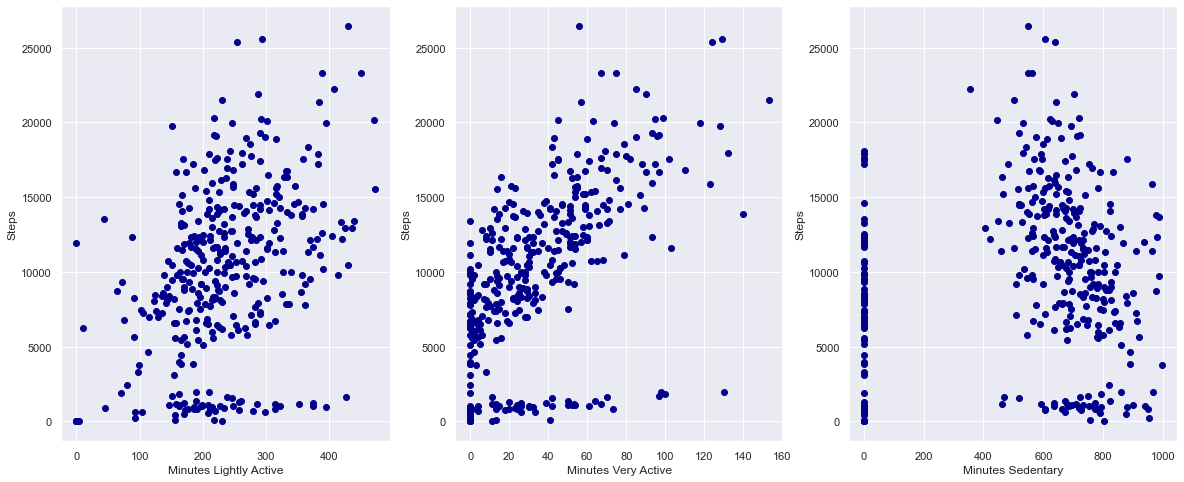

In [11]:
# ALTERNATIVE 1
# Create a df with the columns we are interested in 
cols = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']
df = fitbit[cols]

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1, 3, figsize = (20,8))

# Iterate to draw each scatter plot
for i in range(3):
    plt.sca(ax[i])
    plt.scatter(df[cols[i]], df[cols[3]], color = 'darkblue')
    plt.xlabel(df[cols[i]].name)
    plt.ylabel('Steps')

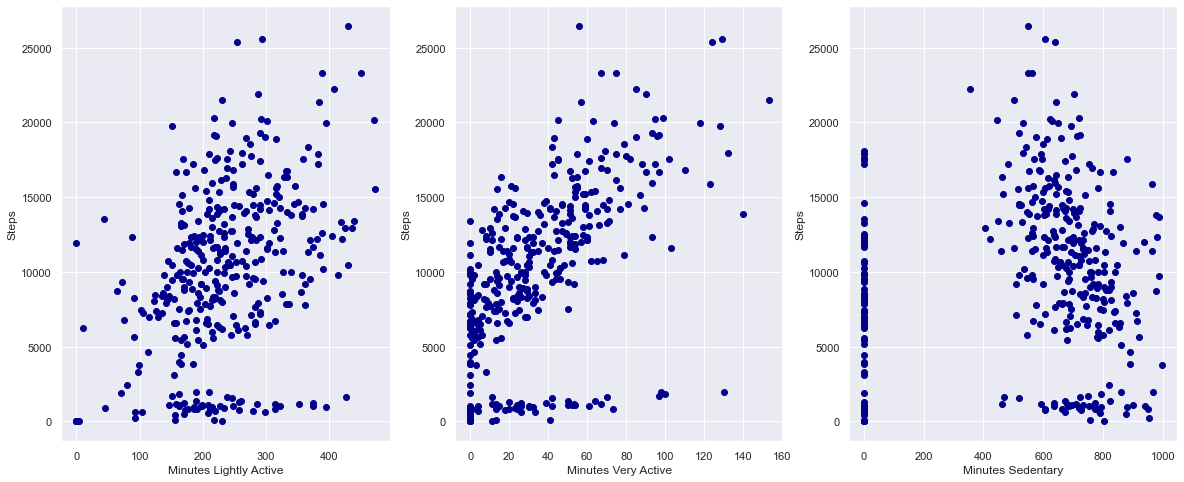

In [12]:
# ALTERNATIVE 2
# Create a df with the columns we are interested in 
cols = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']
df = fitbit[cols]

# Create a figure of a fixed size and axes
f, ax = plt.subplots(1, 3, figsize = (20,8))

# Iterate to draw each scatter plot
for i in range(3):
    ax[i].scatter(df[cols[i]], df[cols[3]], color = 'darkblue')
    ax[i].set_xlabel(df[cols[i]].name)
    ax[i].set_ylabel('Steps')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [13]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [14]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [15]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(exclude=object).dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [16]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(exclude=['int','float']).dtypes

PassengerId     int64
Pclass          int64
Name           object
Gender         object
SibSp           int64
Parch           int64
Ticket         object
Cabin          object
Embarked       object
dtype: object

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [17]:
# your code here
plt.style.use('classic')   # matplotlib
sns.set_style('whitegrid') # seaborn
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

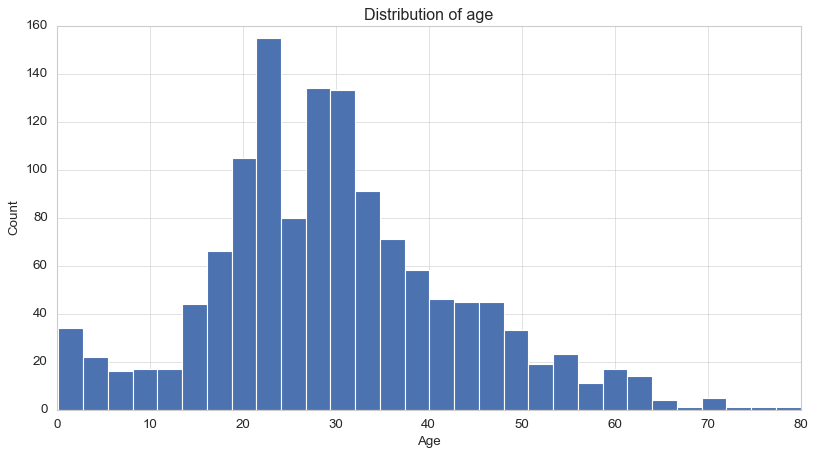

In [18]:
# your code here
titanic['Age'].hist(bins=30)

plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

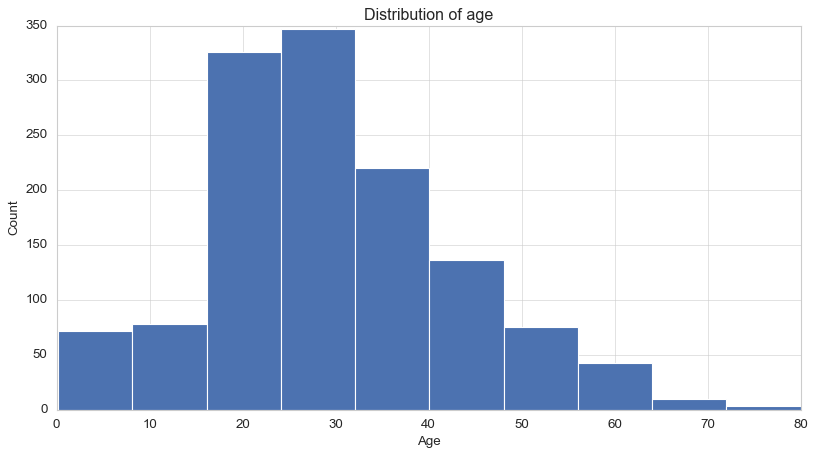

In [19]:
# your code here
titanic['Age'].hist(bins=10)

plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

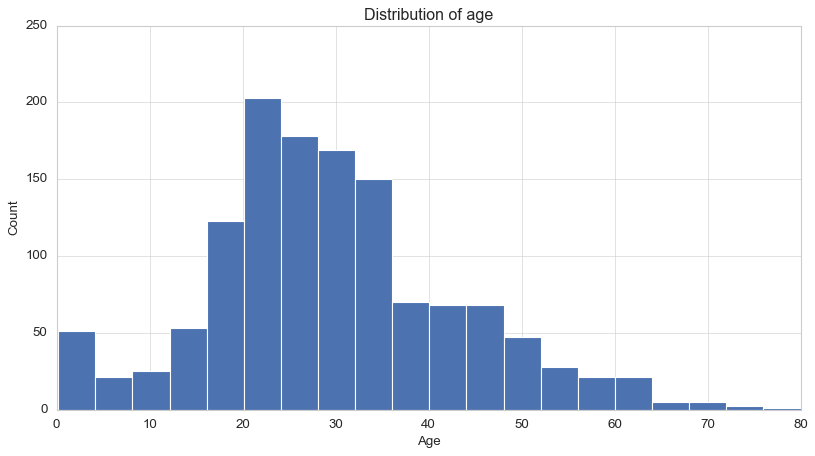

In [20]:
titanic['Age'].hist(bins=20)

plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

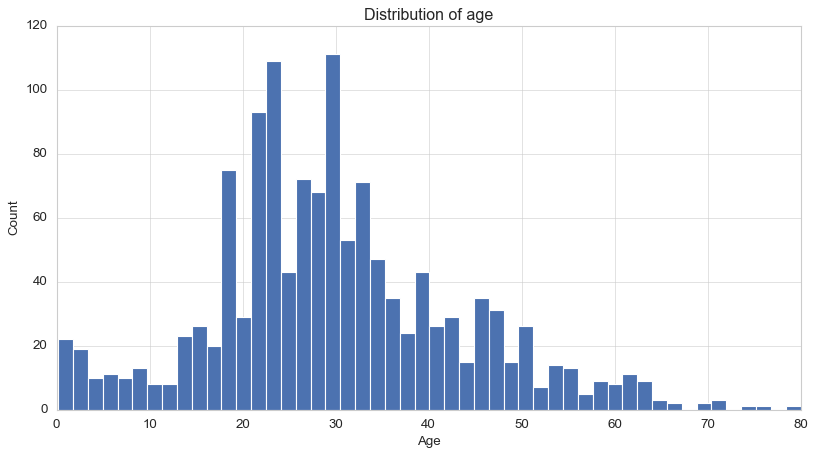

In [21]:
titanic['Age'].hist(bins=50)

plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
Using a low number of bins (wider bins) reduces noise on the distribution estimation while using a high
number of bins (narrower bins) gives greater precision to the distribution estimation (and more noise). 
"""

#### Use seaborn to show the distribution of column `Age`.

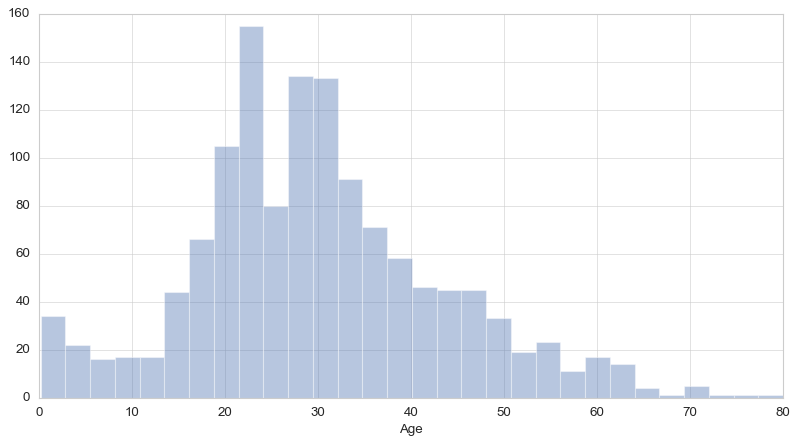

In [22]:
# your code here
sns.distplot(titanic['Age'], bins = 30, kde = False)
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

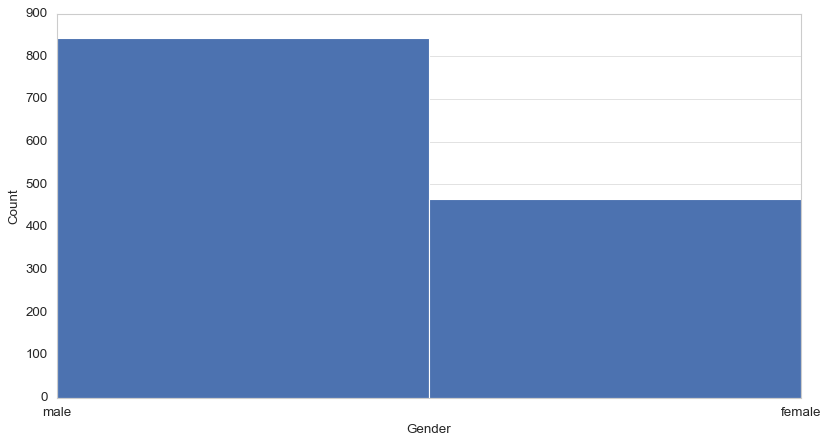

In [23]:
# Method 1 - matplotlib
# your code here
titanic = pd.read_csv('titanic.csv')
data2 = titanic['Gender']
plt.hist(data2, 2)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

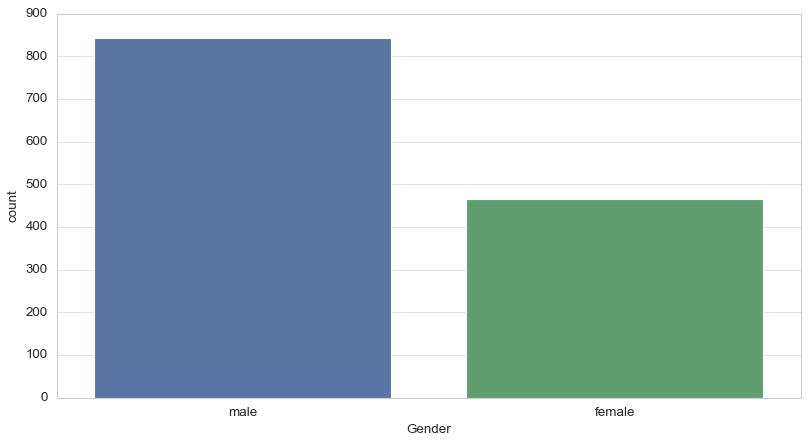

In [24]:
# Method 2 - seaborn
# your code here
sns.countplot(x ='Gender', data = titanic)
plt.show()

#### Use the right plot to visualize the column `Pclass`.

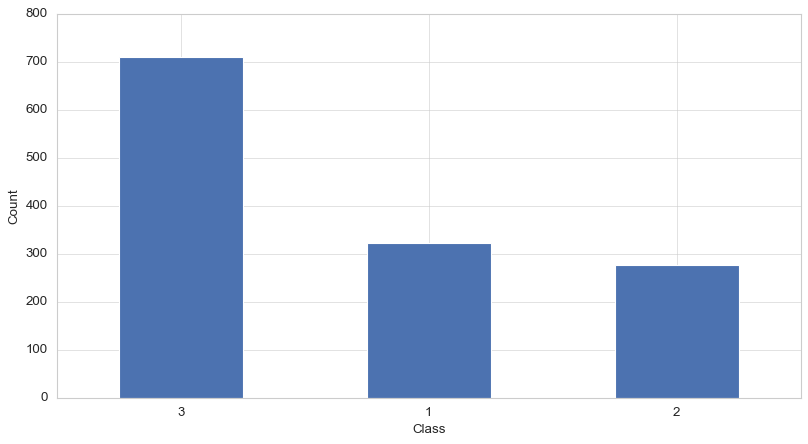

In [25]:
# your code here
titanic['Pclass'].value_counts().plot(kind='bar')

plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation = 0)

plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

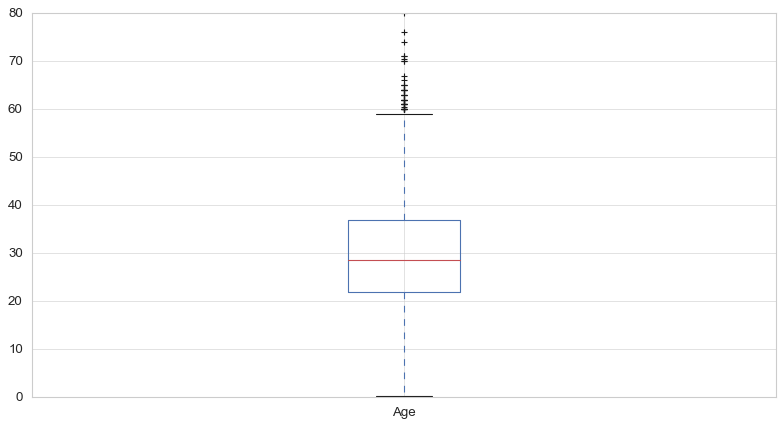

In [26]:
# your code here
titanic.boxplot(column='Age')
plt.show()

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The statistics that you can get from the boxplot are the minimum, first quartile, median, third quartile, and maximum.
The red line shows us the median of Age. 
The blue box shows us the interquartile range (from Q1 to Q3).
It also shows us the outliers, which are out of the maximum and minimum range (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

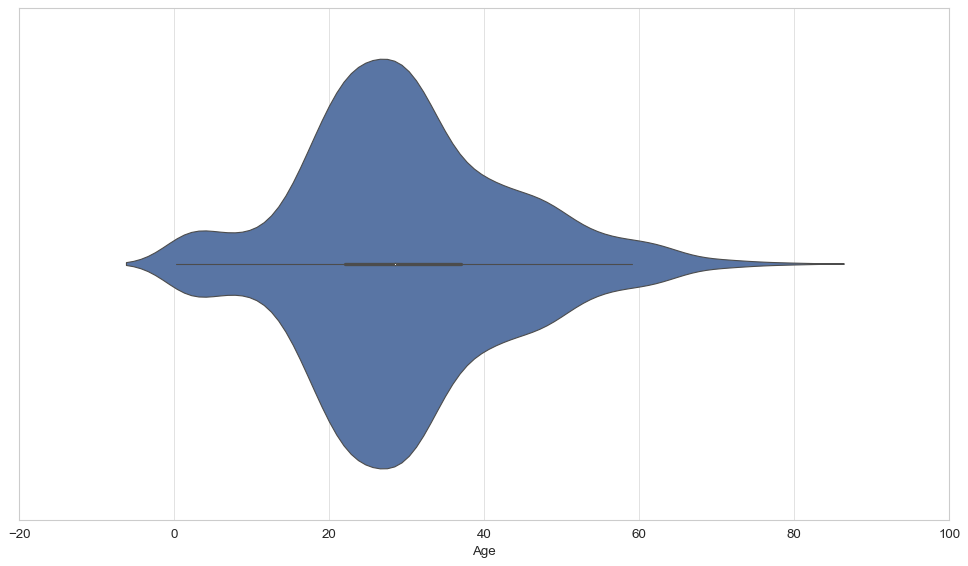

In [27]:
# your code here
plt.figure(figsize = (15,8))
sns.violinplot("Age", data = titanic)
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
This plot is a combination of a boxplot and a density plot. The violin plot features a kernel density estimation of the
underlying distribution of the data.
The black central part of the plot is the same as a boxplot and the white dot is the median.
The blue part is the distribution of the data.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

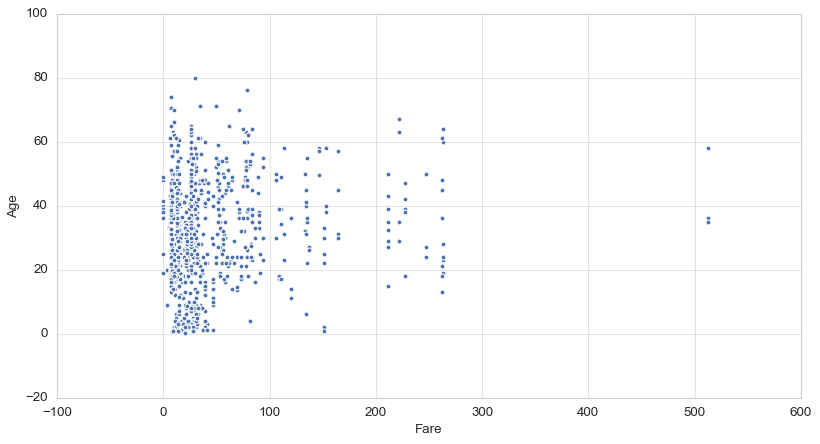

In [28]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic['Fare'], titanic['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

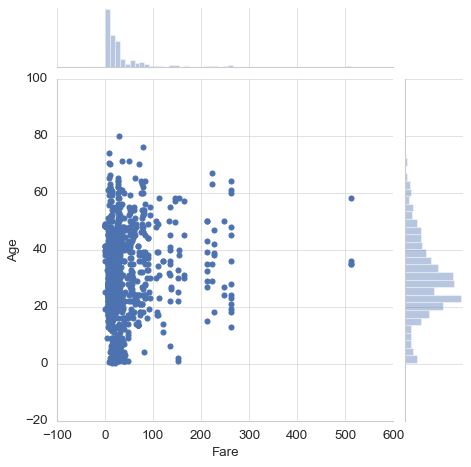

In [29]:
# Method 2 - seaborn
# your code here
sns.jointplot(x = 'Fare', y = 'Age', data = titanic)
plt.show()

#### Plot the correlation matrix using seaborn.

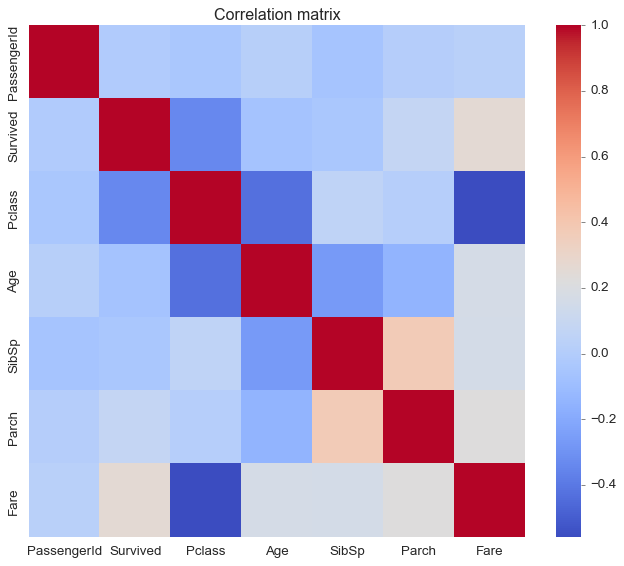

In [30]:
# your code here
plt.figure(figsize = (10,8))
sns.heatmap(titanic.corr(), cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

#### What are the most correlated features?

In [ ]:
"""
The most correlated features are Parch and SibSp.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

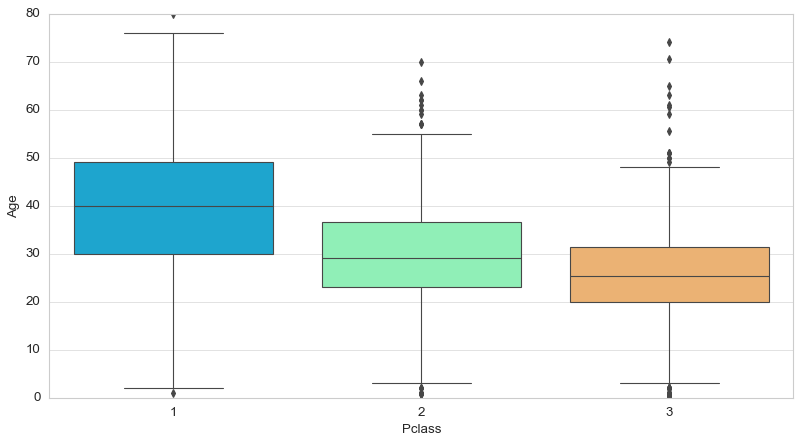

In [31]:
# your code here
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='rainbow')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

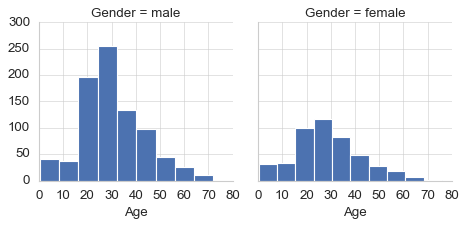

In [32]:
# your code here
g = sns.FacetGrid(data = titanic, col = 'Gender')
g.map(plt.hist, 'Age')
plt.show()